# Work Flow in this analysis:

1) Collection of the data --------2) Data preprocessing ----------3) Data Analysis ----------4) Train_test_split --------- 
5) Classification models---------6) Evaluation


# Importing all Library's:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 1)Data Collection and 2) Processing:

In [2]:
# loading the data through "padas" dataframe:

titanic_data = pd.read_csv("titanic_train.csv")

In [3]:
# executing the first 5 rows of the dataset:

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Observation: 1) Here in the column "Survival" we can see that there are values: 0 and 1 which means the persons who didnot
# survive are taken as "0" and who survived are taken as "1".
#              2) Here in the dataset we can see that there is the combination of the float,int and object types data.
#              3) Here we have to predict the column:"Survival", so that means our target variable or label is "survival" column.

In [5]:
# Checking the number of rows and columns:

titanic_data.shape

(891, 12)

In [6]:
# Basic info of the data:

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Observation: 1) here we can see that the columns are with int type, object type and float type.
#              2) Also here we can see that there are few null values in the columns: "Age", "cabin" and "Embarked".

In [8]:
# Checking the missing values present in the dataset:

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic_data.isnull().sum().sum()

866

In [10]:
# Observation: 1) here we can see that there are null values present in the columns "Age" - 177, "Cabin" - 687, "Embarked" - 2.
#              2) Also we can see that the total number of null values present in the dataset are "2".

# Handling the Missing values:

In [11]:
# Dropping the column: "Cabin" from the dataset:

titanic_data = titanic_data.drop(columns = "Cabin", axis = 1)

In [12]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
# observation: Here we can see that the column "Cabin" is dropped because that column has majority of null values and we cannot
# replace through any technique which is possible and not at all correct method so we dont have any othet option except dropping
# the column, so we are dropping the column: "Cabin".

### Replacing the missing values in the column-"Age" through "mean":

In [14]:
titanic_data["Age"].fillna(titanic_data["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [15]:
# Observation: Here we can see that we have replaced the column through "mean" of the column.

Here we will insert the Age replaced values into the dataset:

In [16]:
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace = True)

In [17]:
# Checking the data info to see whether we handled the missing values in the column:"Age"

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
# Observation: Here we can see that we have the missing values in the column: "Age".

### Replacing the missing values in the column-"Embarked" through "mode":

In [19]:
# Finding the mode of the column: "Embarked":

print(titanic_data["Embarked"].mode())

0    S
dtype: object


In [20]:
# Observation: Here we can see that the mode of the column "Embarked" is "S", now we will replace it into the dataset by using its "index".

In [21]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace = True)

In [22]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [23]:
# observation: here we can see that we have the missing values in the column:"Embarked" and so we dont find any further missing
# values in any of the columns.

# 3) Data Analysis:

### Getting the statistical information of the data:

In [24]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
# Observation: 1) Here we can see that there are "Zeros" in few rows.
#              2) Here for this dataset the important columns which are required for our analysis are "Age" and "Fare".


### Finding the number of people survived and not survived:

In [26]:
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
# Observation: Here we can see that the number of people who survived are: 342 and the number of people of who have not 
# survived are: 549.

# Data Visualization:

## Univariate Analysis:

<AxesSubplot:xlabel='Survived', ylabel='count'>

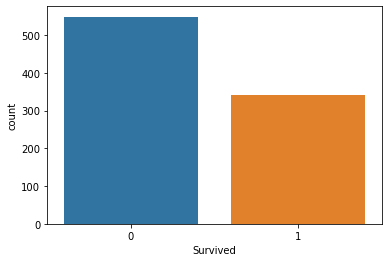

In [28]:
# Plotting of the column: "Survived":

sns.countplot("Survived", data = titanic_data)

In [29]:
# observation: here we can see that the number of persons who have not surived are more than the number of persons who have 
# survived from plot.

<AxesSubplot:xlabel='Sex', ylabel='count'>

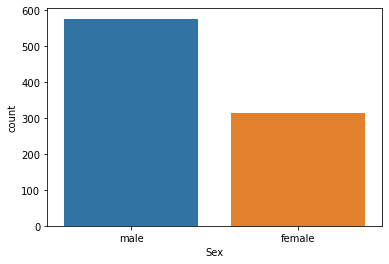

In [30]:
# Plotting of the column: "Sex":

sns.countplot("Sex", data = titanic_data)

In [31]:
# Observation: Here we can understand that the more number of persons are "male" who are travelling and less are "Female" passengers.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

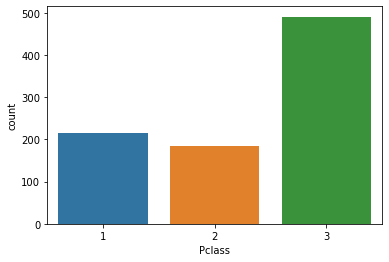

In [32]:
# Plotting of the column: "pclass":

sns.countplot("Pclass", data = titanic_data)

In [33]:
# Observation: Here we can see that the Passengers who borded are more in class - 3 and less in class - 2.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

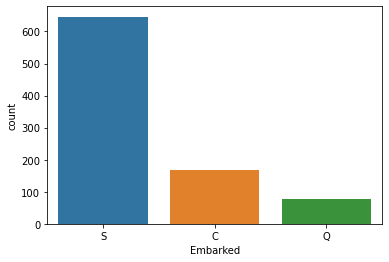

In [34]:
# Plotting of the column: "Embarked":

sns.countplot("Embarked", data = titanic_data)

In [35]:
# Observation: Here we can see that the Passangers have embarked only from the place "S"

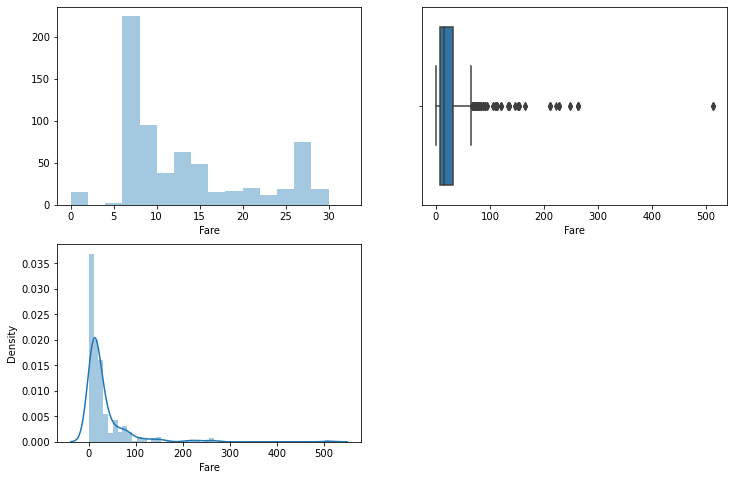

In [36]:
# Plotting of the column: "Fare":

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(titanic_data['Fare'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(titanic_data['Fare']);
plt.subplot(2,2,3)
sns.distplot(titanic_data['Fare']);

In [37]:
# Observation: Here we can see that there are multiple outliers present and the distribution is skewed.

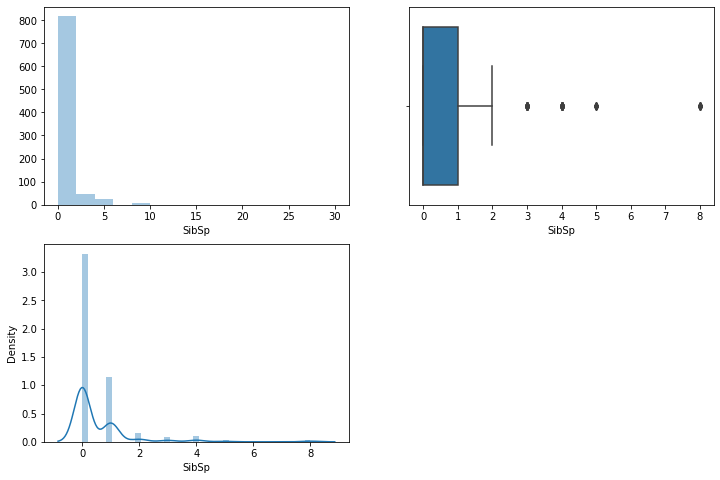

In [38]:
# Plotting of the column: "SibSp":

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(titanic_data['SibSp'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(titanic_data['SibSp']);
plt.subplot(2,2,3)
sns.distplot(titanic_data['SibSp']);

In [39]:
# Observation: here we can see that the outliers are far away and not much impact our model and our distribution is also not normal

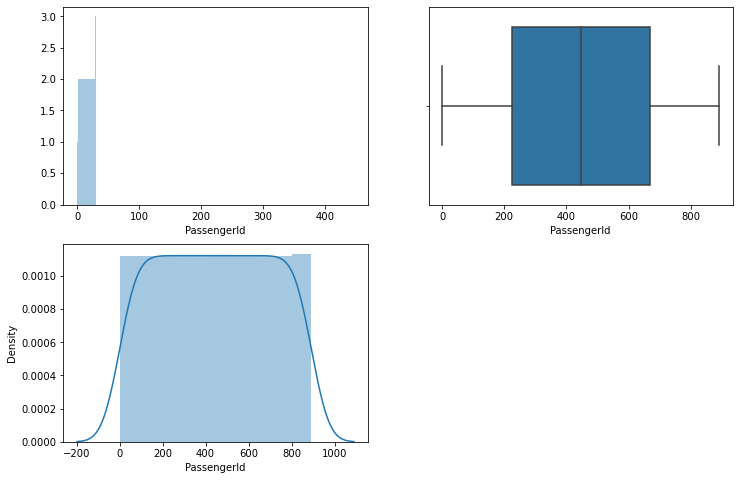

In [40]:
# Plotting of the column: "PassengerId":

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(titanic_data['PassengerId'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(titanic_data['PassengerId']);
plt.subplot(2,2,3)
sns.distplot(titanic_data['PassengerId']);

In [41]:
# Observation: here we can see that there are no outliers and distribution looks normal

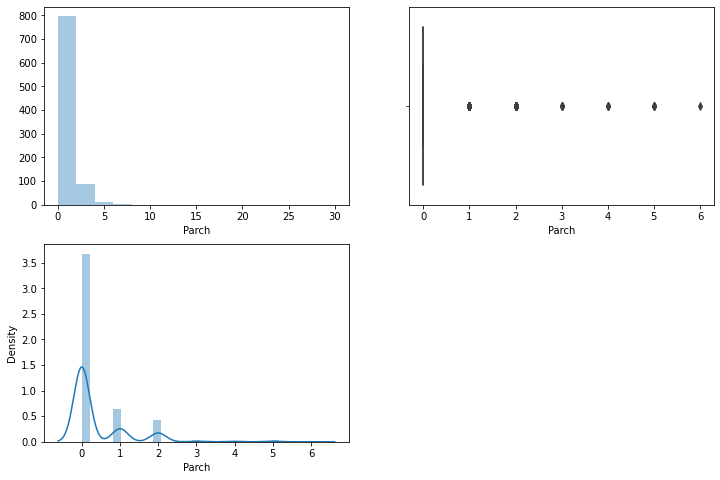

In [42]:
# Plotting of the column: "Parch":

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(titanic_data['Parch'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(titanic_data['Parch']);
plt.subplot(2,2,3)
sns.distplot(titanic_data['Parch']);

In [43]:
# Observation: here we can see that the outliers are far away and not much impact our model and our distribution is also not normal

# Bivariate Analysis:

In [44]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [45]:
# Finding the number of people survived as per "Gender" basis:

<AxesSubplot:xlabel='Sex', ylabel='count'>

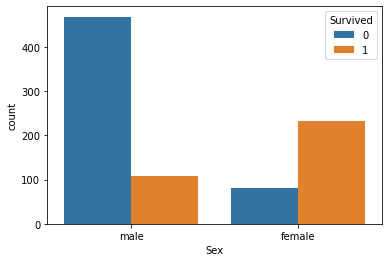

In [46]:
sns.countplot("Sex", hue = "Survived" , data = titanic_data )

In [47]:
# Observation: Here we can see that there are more number of males who have not survived compared to females even though the
# count of males are more in number when compared to females.

In [48]:
# Finding the number of people survived as per "Pclass" basis:

<AxesSubplot:xlabel='Pclass', ylabel='count'>

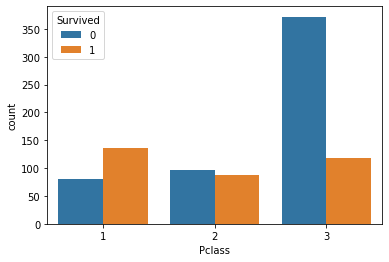

In [49]:
sns.countplot("Pclass", hue = "Survived" , data = titanic_data )

In [50]:
# Observation: Here we can see that the number of survived are more in class- 1 when compared to the othet classes and the class-3
# has the most unsurvived people in its category.

In [51]:
# Finding the number of people survived as per "Embarked" basis:

<AxesSubplot:xlabel='Embarked', ylabel='count'>

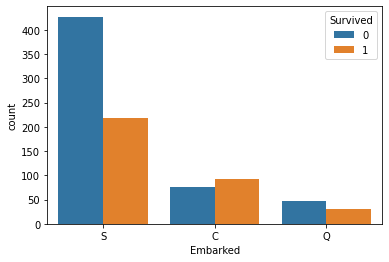

In [52]:
sns.countplot("Embarked", hue = "Survived" , data = titanic_data )

In [53]:
# Observation: Here we can see that there are more number of unsurvived people embarked from the region "S" and also more 
# number of survived people are from region "S" when compared to the other embarked regions.

# Multivariate Analysis:

In [54]:
data_new = titanic_data.drop("Ticket", axis = 1)

In [55]:
data_new_1 = data_new.drop("Name", axis = 1)

In [56]:
data_new_2 = data_new_1.drop("PassengerId" , axis = 1)

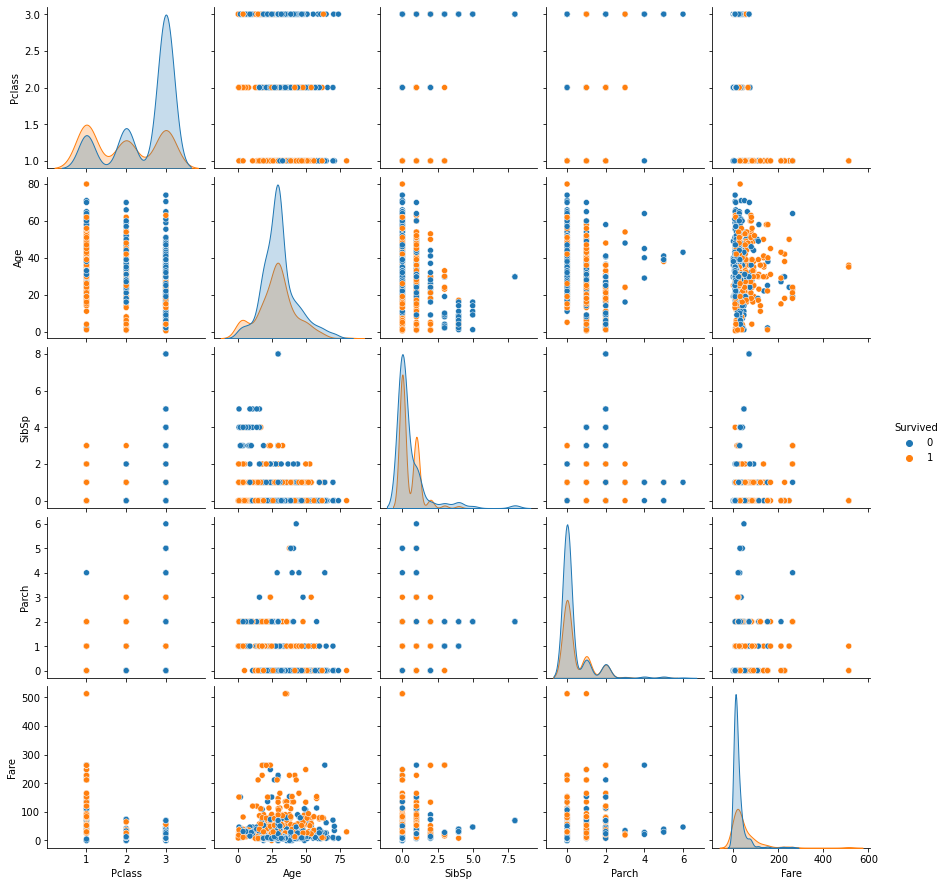

In [57]:
sns.pairplot(data_new_2,hue="Survived")

In [58]:
# Observation: here we can see that there is high correlation between "Age" and "Fare".

In [59]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Encoding the Categorical Columns:

In [60]:
titanic_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [61]:
# Observation: here we can see that the number of males = 577 and the number of females are 314 and thus can say the number of
# males are more in number when compared to females.

In [62]:
titanic_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
# Observation: here we can see that the more number of passangers are from the region "S" when compared to the others

## Converting the Categorical Columns into the Numerical Columns:

In [64]:
titanic_data.replace({"Sex":{"male": 0, "female" : 1}, "Embarked" : {'S' : 0, 'Q' : 1, 'C' : 2}}, inplace = True)

In [65]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Separating the features and Target:

In [66]:
x = titanic_data.drop(columns = ["PassengerId","Name","Ticket","Survived"], axis = 1)
y = titanic_data["Survived"]

In [67]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,2
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,2


In [68]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the data into training data and test data:

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [70]:
x_train.shape

(712, 7)

In [71]:
x_test.shape

(179, 7)

In [72]:
y_train.shape

(712,)

In [73]:
x.shape

(891, 7)

# Model training:

## Logistic Regression:

In [74]:
model = LogisticRegression()

In [75]:
model

LogisticRegression()

In [76]:
# training the model with training data:

model.fit(x_train,y_train)

LogisticRegression()

In [77]:
# Accuracy on the training data:

x_train_prediction = model.predict(x_train)

In [78]:
x_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [79]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [80]:
print("Accuracy Score of training data:" , training_data_accuracy)

Accuracy Score of training data: 0.8132022471910112


In [81]:
# observation: The accuracy score for our training data is 81.3%

In [82]:
# Accuracy on the testing data:

x_test_prediction = model.predict(x_test)

In [83]:
x_test_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [84]:
testing_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [85]:
print("Accuracy Score of testing data:" , testing_data_accuracy)

Accuracy Score of testing data: 0.7877094972067039


# KNeighborsClassifier:

In [86]:
model=KNeighborsClassifier(n_neighbors=6)

In [87]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [88]:
prediction=model.predict(x_test)


# DecisionTreeClassifier:

In [89]:
model2=DecisionTreeClassifier()

In [90]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
prediction2=model2.predict(x_test)


# Creating Confusion matrix:

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
kconfusion=confusion_matrix(prediction,y_test)

In [94]:
dconfusion=confusion_matrix(prediction2,y_test)

In [95]:
kconfusion


array([[88, 47],
       [12, 32]], dtype=int64)

In [96]:
dconfusion

array([[83, 22],
       [17, 57]], dtype=int64)

# Checking the accuracy score:

In [97]:
score=round(accuracy_score(prediction,y_test)*100,2)
score

67.04

In [98]:
score1=round(accuracy_score(prediction2,y_test)*100,2)
score1

78.21

# Saving the model:

In [99]:
import pickle
filename = 'churn.pkl'
pickle.dump(model,open(filename, 'wb'))

# Conclusion:

In [100]:
testing_data_accuracy

0.7877094972067039

In [101]:
conclusion = pd.DataFrame([model.predict(x_test)[:],x_test_prediction[:]],index = ["Predicted","Original"])

In [102]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
Predicted,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


Therefore our bestmodel is "LogisticRegression" and the accracy score is 78.7%